<a href="https://colab.research.google.com/github/contrerasisaac/Intro_to_ML/blob/main/Gradient_Descent_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In this lesson, we will cover the following:
- What is a Neural Network?
- How Does Gradient Descent work?
- Training a Digit Classifier

# What is a Neural Network

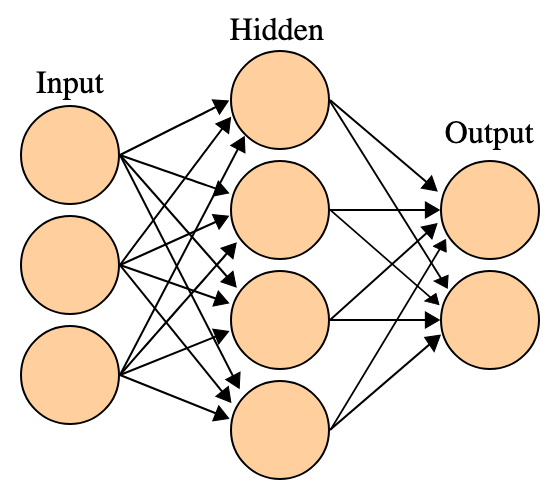

A neural network is a computational model inspired by the structure and function of the human brain's neural networks. It is a type of machine learning algorithm that is particularly well-suited for tasks such as pattern recognition, classification, regression, and decision making. Neural networks consist of interconnected artificial neurons (also called nodes or units) organized into layers, and they learn to perform tasks through a process called training.

Here are the key components of a neural network:

- **Neurons (Nodes/Units)**: The basic building blocks of a neural network. Each neuron takes input, processes it using an activation function, and produces an output. The output of one neuron can be connected to the input of another, forming the network's structure.
- **Layers**: Neurons are organized into layers within the neural network. The three main types of layers are:
- **Input Layer**: Receives and passes the input data to the subsequent layers.
- **Hidden Layer(s)**: Layers between the input and output layers. They process the input data and extract relevant features.
- **Output Layer**: Produces the final output or prediction based on the processed information from the hidden layers.
- **Weights and Biases**: Each connection between neurons has an associated weight, and each neuron has a bias. During training, the neural network adjusts these parameters to learn from the input data and improve its performance.

Consider how neural networks might tackle the problem of classifying hand-drawn images of numbers $0-9$. Pixels toward the bottom right are not very likely to be activated for a $7$, so they should have a low weight for a $7$, but they are likely to be activated for an $8$, so they should have a high weight for an $8$. This can be represented as a function and set of weight values for each possible category—for instance the probability of being the number $8$:

```
def pr_eight(x,w): return (x*w).sum()
```

Here we are assuming that `x` is the image, represented as a vector—in other words, with all of the rows stacked up end to end into a single long line. And we are assuming that the weights are a vector `w`. If we have this function, then we just need some way to update the weights to make them a little bit better. With such an approach, we can repeat that step a number of times, making the weights better and better, until they are as good as we can make them.

We want to find the specific values for the vector `w` that causes the result of our function to be high for those images that are actually 8s, and low for those images that are not. Searching for the best vector `w` is a way to search for the best function for recognising 8s.

To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:

1. *Initialize* the weights.
1. For each image, use these weights to *predict* whether it appears to be a 3 or a 7.
1. Based on these predictions, calculate how good the model is (its *loss*).
1. Calculate the *gradient*, which measures for each weight, how changing that weight would change the loss
1. *Step* (that is, change) all the weights based on that calculation.
1. Go back to the step 2, and *repeat* the process.
1. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

These seven steps are the key to the training of all deep learning models. That deep learning turns out to rely entirely on these steps is extremely surprising and counterintuitive. It's amazing that this process can solve such complex problems. But, as you'll see, it really does!

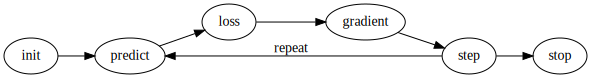

In [ ]:
# The following diagram is a useful visualization of the 7-step process
# described above

gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

These are the details that make a big difference for deep learning practitioners, but it turns out that the general approach to each one generally follows some basic principles. Here are a few guidelines:

- **Initialize**: We initialize the parameters to random values. This may sound surprising. There are certainly other choices we could make, such as initializing them to the percentage of times that pixel is activated for that category—but since we already know that we have a routine to improve these weights, it turns out that just starting with random weights works perfectly well.
- **Loss**: *Testing the effectiveness of any current weight assignment in terms of actual performance*. We need some function that will return a number that is small if the performance of the model is good (the standard approach is to treat a small loss as good, and a large loss as bad, although this is just a convention).
- **Step**: A simple way to figure out whether a weight should be increased a bit, or decreased a bit, would be just to try it: increase the weight by a small amount, and see if the loss goes up or down. Once you find the correct direction, you could then change that amount by a bit more, and a bit less, until you find an amount that works well. However, this is slow! As we will see, the magic of calculus allows us to directly figure out in which direction, and by roughly how much, to change each weight, without having to try all these small changes. The way to do this is by calculating *gradients*. This is just a performance optimization, we would get exactly the same results by using the slower manual process as well.
- **Stop**: Once we've decided how many epochs to train the model for (a few suggestions for this were given in the earlier list), we apply that decision. This is where that decision is applied. For our digit classifier, we would keep training until the accuracy of the model started getting worse, or we ran out of time.

### Activation Functions

**Activation functions** are an essential component of artificial neural networks. They introduce non-linearity to the model and allow neural networks to learn complex and nonlinear patterns from the input data. Without activation functions, a neural network would simply be a series of linear transformations, which would severely limit its ability to represent and learn from diverse data patterns.

The following are important activation functions, although many more exist:
- Sigmoid
- ReLU

#### Sigmoid

The `sigmoid` function always outputs a number between 0 and 1. It's defined as follows:

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

Pytorch defines an accelerated version for us, so we don’t really need our own. This is an important function in deep learning, since we often want to ensure values are between 0 and 1. This is what it looks like:

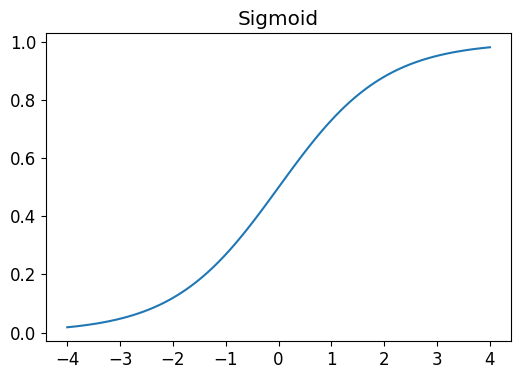

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

As you can see, it takes any input value, positive or negative, and smooshes it onto an output value between 0 and 1. It's also a smooth curve that only goes up, which makes it easier to optimize to find meaningful gradients.

#### ReLU

**ReLU** (Rectified Linear Unit) is a simple and widely used activation function that outputs the input if it's positive and zero otherwise. It helps with the vanishing gradient problem and accelerates convergence during training. It is defined as follows:

$$\text{ReLU}(x)=\max(0, x)$$

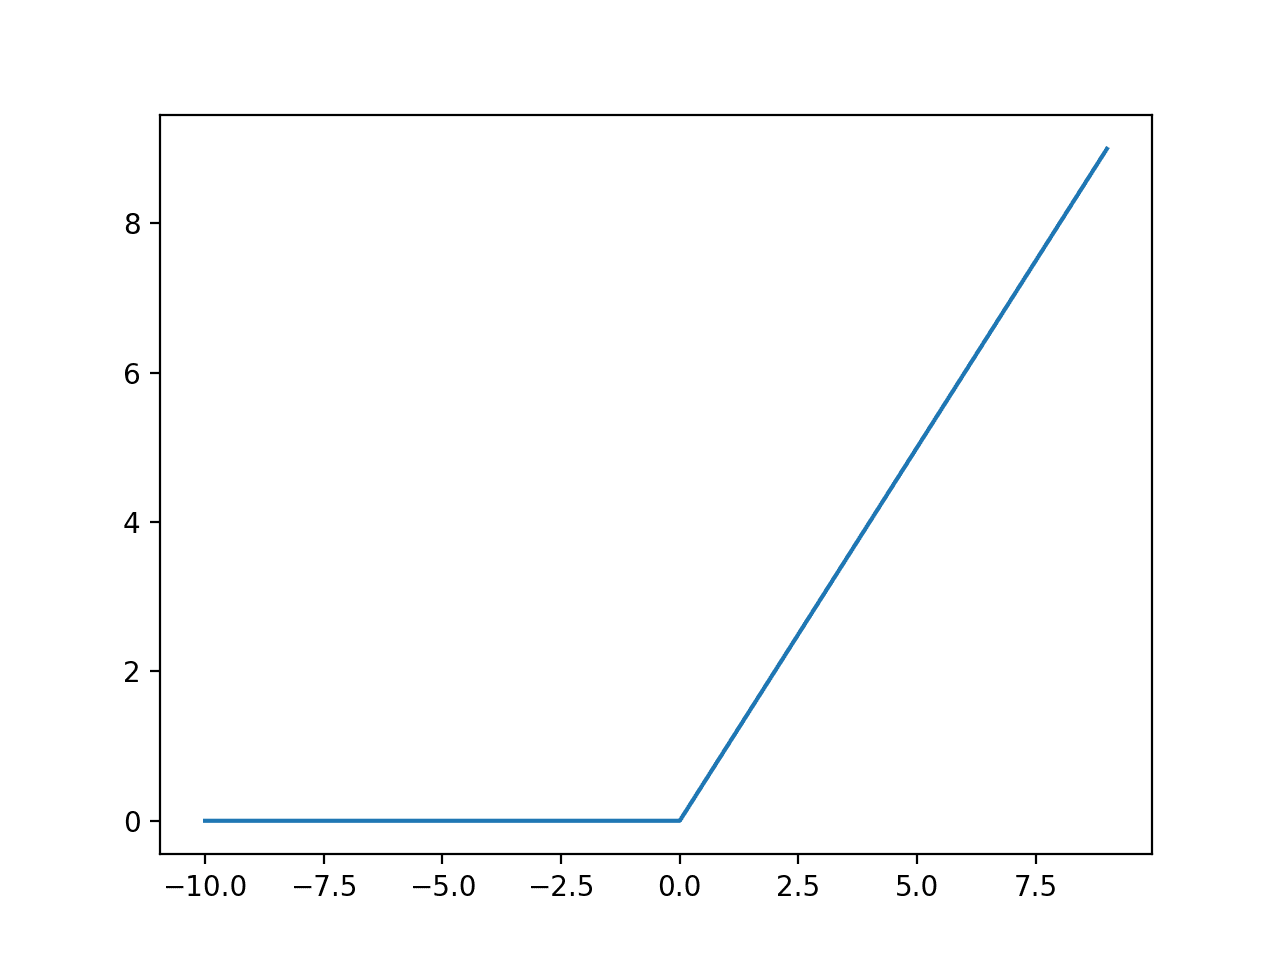

# Gradient Descent

### What is Gradient Descent?

In machine learning, the theory of optimization (i.e finding a min or max) is incredibly important, as we're ultimately just minimizing our loss function. We will often have to employ techniques that solve complex optimization problems that cannot be solved directly. Thus, we use "numerical" techniques to approximate the minimum, the most famous one being **gradient descent**.

While we normally deal with incredibly complicated, high-dimensional functions, for now consider a simple case: $f(x)=x^2$. If you have learned calculus, for now, pretend that you can't just set the derivative $f'(x)=0$ and solve for $x$.

Let's use gradient descent to find the minimum of $f(x)=x^2$.

In [ ]:
def f(x): return x**2

Here is a graph of $f$:

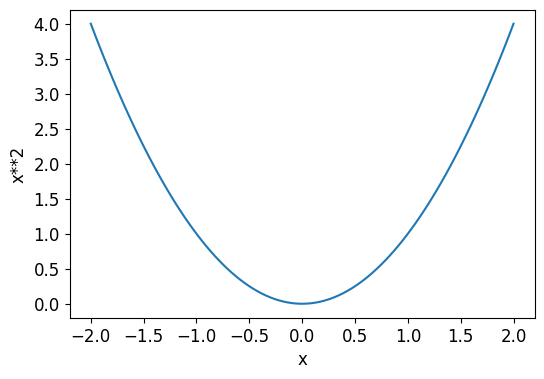

In [ ]:
plot_function(f, 'x', 'x**2')

Given an initial starting point $x_0$, how can we find the minimum, denoted $x^*$?

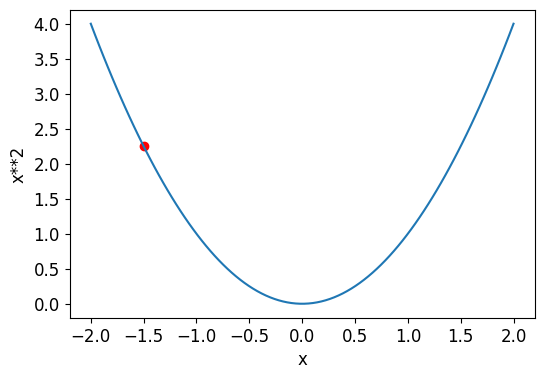

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

Looking at the image above, it's clear that we need to 'fall' down into the valley. What does this mean, mathematically?

We want to update $x_0$ such that it's closer to $x^*$. This corresponds to adjusting $x_0$ by the direction of steepest descent. That is, set $x_1$ according to the following update rule:

$$x_1\leftarrow x_0-\alpha f'(x_0)$$

Here, $\alpha$ is what's called the **learning rate**. It corresponds to how much we want to update $x_0$ in the direction of $f'(x_0)$. Think of $f'(x_0)$ as the slope at the point $x_0$. For higher-dimensional functions, it is often called the **gradient**, and is denoted $\nabla f(x_0)$.

Don't worry too much about what this means for now, just understand that we update in the direction of steepest descent.

<img alt="A graph showing the squared function with the slope at one point" width="400" src="https://github.com/fastai/fastbook/blob/master/images/grad_illustration.svg?raw=1"/>

To connect this to neural networks, you can think of $x$ as the **parameters** of the neural network and $f(x)$ is the **loss** of the neural network.
- Parameters are the values the control how a neural network acts
- As machine learning engineers, we choose how many parameters our model has, but we don't choose their values
- We use optimization algorithms like gradient descent to choose the values of our parameters
- Loss is a measure of how well our neural network works
- Minimizing loss corresponds to making our neural network better, so you can see why we care so much about this optimization problem


We can change our weight by a little in the direction of the slope, calculate our loss and adjustment again, and repeat this a few times. Eventually, we will get to the lowest point on our curve:

<img alt="An illustration of gradient descent" width="400" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_perfect.svg?raw=1"/>

In general, a gradient descent step looks like the following:

$$x_{i+1}\leftarrow x_i -\alpha f'(x_i).$$

If $\alpha$ is small enough, then running gradient descent will converge given enough time.

This idea goes all the way back to Isaac Newton, who pointed out that we can optimize *arbitrary functions* in this way. Regardless of how complicated our functions become, this basic approach of gradient descent will not significantly change.

### Calculating Gradients

The magic of gradient descent comes from the gradients, as the name would suggest. We use calculus as a optimization tool; it allows us to more quickly calculate whether our loss will go up or down when we adjust our parameters up or down. In other words, the gradients will tell us how much we have to change each weight to make our model better.

The **derivative** of a function tells you how much a change in its parameters will change its result. The key point about a derivative is this: for any smooth function, such as the quadratic function we saw in the previous section, we can calculate its derivative. The derivative is another function. It calculates the instantaneous rate of change, rather than the value.

For example, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. More specifically, you may recall that gradient is defined as *rise/run*, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller.

This is the key to machine learning: having a way to change the parameters of a function to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.

One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative we won't get back one number, but lots of them—a gradient for every weight.

Amazingly enough, PyTorch is able to automatically compute the derivative of nearly any function! What's more, it does it very fast. Most of the time, it will be at least as fast as any derivative function that you can create by hand. Let's see an example.

First, let's pick a tensor value which we want gradients at. Don't worry too much about what "tensor" means, just think of it as a nice data structure that wraps around our data that allows Pytorch to run useful functions.

In [ ]:
# Pytorch works with tensors, so "xt" stands for x tensor.

xt = tensor(3.).requires_grad_()

In [ ]:
xt

tensor(3., requires_grad=True)

Notice the special method `requires_grad_`? That's the magical incantation we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.

Now we calculate our function with that value. Notice how PyTorch prints not just the value calculated, but also a note that it has a gradient function it'll be using to calculate our gradients when needed:

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

Finally, we tell PyTorch to calculate the gradients for us:

In [ ]:
yt.backward()

The "backward" here refers to **backpropagation**, which is the name given to the process of calculating the derivative of each layer. This is the algorithm that neural networks use to calculate the gradients of each of their parameters. We won't cover much more of the specifics of backpropagation in this notebook, but there are many online resources you can read that cover it in great detail.

We can now view the gradients by checking the `grad` attribute of our tensor:

In [ ]:
xt.grad

tensor(6.)

:The derivative of `x**2` is `2*x`, and we have `x=3`, so the gradients should be `2*3=6`, which is what PyTorch calculated for us!

### Stepping With a Learning Rate

Deciding how to change our parameters based on the values of the gradients is an important part of the deep learning process. This is where the $\alpha$ from earlier comes into play.

Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the *learning rate* (often denoted by $\alpha$, $\eta$, or just lr).

The learning rate is often a very small number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training.

If you pick a learning rate that's too low, it can mean having to do a lot of steps.

<img alt="An illustration of gradient descent with a LR too low" width="400" caption="Gradient descent with low LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_small.svg?raw=1" id="descent_small"/>

But picking a learning rate that's too high is even worse—it can actually result in the loss getting *worse*.

<img alt="An illustration of gradient descent with a LR too high" width="400" caption="Gradient descent with high LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_div.svg?raw=1" id="descent_div"/>

If the learning rate is too high, it may also "bounce" around, rather than actually diverging.

<img alt="An illustation of gradient descent with a bouncy LR" width="400" caption="Gradient descent with bouncy LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_bouncy.svg?raw=1" id="descent_bouncy"/>

# Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

In order to understand what happens in a computer vision model, we first have to understand how computers handle images. We'll use one of the most famous datasets in computer vision, [MNIST](https://en.wikipedia.org/wiki/MNIST_database), for our experiments. MNIST contains images of handwritten digits, collected by the National Institute of Standards and Technology and collated into a machine learning dataset by Yann Lecun and his colleagues. Lecun used MNIST in 1998 in [Lenet-5](http://yann.lecun.com/exdb/lenet/), the first computer system to demonstrate practically useful recognition of handwritten digit sequences. This was one of the most important breakthroughs in the history of AI.

For this initial tutorial we are just going to try to create a model that can classify any image as a 3 or a 7. So let's download a sample of MNIST that contains images of just these digits:

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

We can see what's in this directory by using `ls`, a method in the fastai library. This method returns an object of a special fastai class called `L`, which has all the same functionality of Python's built-in `list`, plus a lot more. One of its handy features is that, when printed, it displays the count of items, before listing the items themselves (if there are more than 10 items, it just shows the first few):

In [ ]:
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation set (and/or test set). Let's see what's inside the training set:

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

There's a folder of 3s, and a folder of 7s. In machine learning parlance, we say that "3" and "7" are the *labels* (or targets) in this dataset. Let's take a look in one of these folders (using `sorted` to ensure we all get the same order of files):

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

As we might expect, it's full of image files. Let’s take a look at one now. Here’s an image of a handwritten number 3, taken from the famous MNIST dataset of handwritten numbers:

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

Here we are using the `Image` class from the *Python Imaging Library* (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a *NumPy array* or a *PyTorch tensor*. For instance, here's what a section of the image looks like, converted to a NumPy array:

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

The `4:10` indicates we requested the rows from index 4 (included) to 10 (not included) and the same for the columns. NumPy indexes from top to bottom and left to right, so this section is located in the top-left corner of the image. Here's the same thing as a PyTorch tensor:

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

We can slice the array and then use a Pandas DataFrame to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values:

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:25,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


You can see that the background white pixels are stored as the number 0, black is the number 255, and shades of gray are between the two. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our initial learning and experiments. We will build up to bigger, full-color images soon.)

So, now you've seen what an image looks like to a computer. Next, lets create a neural network that can distinguish between 3s and 7s.



## Linear model with PyTorch and FastAI

Before doing anything, let's load the data.

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

dset = list(zip(train_x,train_y))
dl = DataLoader(dset, batch_size=256)

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

Let's create a simple linear model that predicts whether an image is a 3 or a 7 using PyTorch and FastAI.

First, an introduction to PyTorch. PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). It has gained immense popularity for its ease of use, flexibility, and dynamic computational graph, making it a powerful tool for building and training deep learning models.

PyTorch provides a high-level abstraction called `torch.nn.Module` that allows you to define neural network architectures layer-by-layer. You can compose different layers, activation functions, and loss functions to create sophisticated models with ease.

We'll use `nn.Linear` to create a linear layer for our neural network. It contains both the *weights* and *biases* in a single class. The following code represents a layer with input size `28*28, 1`.

In [ ]:
linear_model = nn.Linear(28*28,1)

Every PyTorch module knows what parameters it has that can be trained; they are available through the `parameters` method:

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can use this information to create an optimizer:

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

We can create our optimizer by passing in the model's parameters:

In [ ]:
lr = 1e-5
opt = BasicOptim(linear_model.parameters(), lr)

Next, we write our training loop.

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

Define our validation function as follows:

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear_model)

0.4885

Let's put our little training loop in a function, to make things simpler:

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

Here are the results:

In [ ]:
train_model(linear_model, 20)

0.4885 0.4894 0.4914 0.4919 0.4919 0.4924 0.4929 0.4934 0.4944 0.4949 0.4954 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4964 0.4973 

fastai provides the `SGD` class which, by default, does the same thing as our `BasicOptim`:

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4685 0.471 0.4744 0.4773 0.4803 0.4813 0.4828 0.4842 0.4857 0.4867 0.4877 0.4891 0.4916 0.4941 0.4965 0.4985 0.5009 0.5014 0.5029 0.5054 

fastai also provides `Learner.fit`, which we can use instead of `train_model`. To create a `Learner` we first need to create a `DataLoaders`, by passing in our training and validation `DataLoader`s:

In [ ]:
dls = DataLoaders(dl, valid_dl)

To create a `Learner` without using an application (such as `vision_learner`) we need to pass in all the elements that we've created in this chapter: the `DataLoaders`, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

Now we can call `fit`:

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.473753,0.484265,0.607458,00:00
1,0.473616,0.484059,0.608440,00:00
2,0.473458,0.483854,0.610402,00:00
3,0.473286,0.483648,0.610402,00:00
4,0.473107,0.483443,0.611874,00:00
5,0.472923,0.483237,0.611874,00:00
6,0.472737,0.483032,0.613837,00:00
7,0.472550,0.482827,0.616291,00:00
8,0.472363,0.482621,0.616781,00:00
9,0.472176,0.482416,0.617272,00:00


As you can see, there's nothing magic about the PyTorch and fastai classes. They are just convenient pre-packaged pieces that make your life a bit easier!

With these classes, we can now replace our linear model with a neural network.

## Adding a Nonlinearity

So far we have a general procedure for optimizing the parameters of a function, and we have tried it out on a very boring function: a simple linear classifier. A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

Here is the entire definition of a basic neural network:

In [ ]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

That's it! All we have in `simple_net` is two linear classifiers with a `max` function between them.

Here, `w1` and `w2` are weight tensors, and `b1` and `b2` are bias tensors; that is, parameters that are initially randomly initialized, just like we did in the previous section:

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point about this is that `w1` has 30 output activations (which means that `w2` must have 30 input activations, so they match). That means that the first layer can construct 30 different features, each representing some different mix of pixels. You can change that `30` to anything you like, to make the model more or less complex.

That little function `res.max(tensor(0.0))` is called a *rectified linear unit*, also known as *ReLU*, as discussed above in the activation functions section. We think we can all agree that *rectified linear unit* sounds pretty fancy and complicated... But actually, there's nothing more to it than `res.max(tensor(0.0))`—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as `F.relu`:

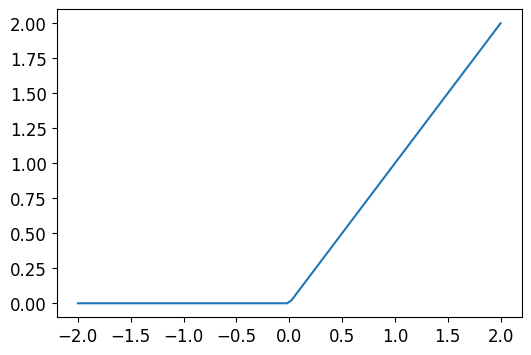

In [ ]:
plot_function(F.relu)

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as `max`, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work. The `max` function is particularly interesting, because it operates as a simple `if` statement.

Mathematically, we say the composition of two linear functions is another linear function. So, we can stack as many linear classifiers as we want on top of each other, and without nonlinear functions between them, it will just be the same as one linear classifier.

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for `w1` and `w2` and if you make these matrices big enough. For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the *universal approximation theorem*. The three lines of code that we have here are known as *layers*. The first and third are known as *linear layers*, and the second line of code is known variously as a *nonlinearity*, or *activation function*.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch:

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

`nn.ReLU` is a PyTorch module that does exactly the same thing as the `F.relu` function. Most functions that can appear in a model also have identical forms that are modules. Generally, it's just a case of replacing `F` with `nn` and changing the capitalization. When using `nn.Sequential`, PyTorch requires us to use the module version. Since modules are classes, we have to instantiate them, which is why you see `nn.ReLU()` in this example.

Because `nn.Sequential` is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. Let's try it out! As this is a deeper model, we'll use a lower learning rate and a few more epochs.

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.321553,0.398654,0.509323,00:00
1,0.148813,0.229344,0.803729,00:00
2,0.082180,0.115545,0.912169,00:00
3,0.053814,0.077860,0.941609,00:00
4,0.040673,0.060659,0.958292,00:00
5,0.033984,0.051013,0.963690,00:00
6,0.030156,0.044946,0.965162,00:00
7,0.027680,0.040815,0.967615,00:00
8,0.025901,0.037830,0.969578,00:00
9,0.024526,0.035563,0.970559,00:00


The training process is recorded in `learn.recorder`, with the table of output stored in the `values` attribute, so we can plot the accuracy over training as:

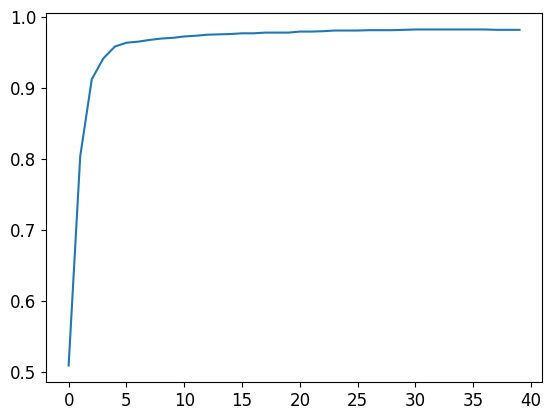

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

And we can view the final accuracy:

In [ ]:
learn.recorder.values[-1][2]

0.981844961643219

At this point we have something that is rather magical:

1. A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters
1. A way to find the best set of parameters for any function (stochastic gradient descent)

This is why deep learning can do things which seem rather magical, such fantastic things. Believing that this combination of simple techniques can really solve any problem is one of the biggest steps that we find many students have to take. It seems too good to be true—surely things should be more difficult and complicated than this? Our recommendation: try it out! We just tried it on the MNIST dataset and you have seen the results. And since we are doing everything from scratch ourselves (except for calculating the gradients) you know that there is no special magic hiding behind the scenes.

### Going Deeper

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers. As you will learn, however, the deeper the model gets, the harder it is to optimize the parameters in practice. Later in this book you will learn about some simple but brilliantly effective techniques for training deeper models.

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

That means that we can train the model more quickly, and it will take up less memory. In the 1990s researchers were so focused on the universal approximation theorem that very few were experimenting with more than one nonlinearity. This theoretical but not practical foundation held back the field for years. Some researchers, however, did experiment with deep models, and eventually were able to show that these models could perform much better in practice. Eventually, theoretical results were developed which showed why this happens. Today, it is extremely unusual to find anybody using a neural network with just one nonlinearity.

Here is what happens when we train an 18-layer model:

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.066731,0.010959,0.997056,00:29


Nearly 100% accuracy! That's a big difference compared to our simple neural net. There are just a few little tricks you need to use to get such great results from scratch yourself. You already know the key foundational pieces. (Of course, even once you know all the tricks, you'll nearly always want to work with the pre-built classes provided by PyTorch and fastai, because they save you having to think about all the little details yourself.)

Congratulations: you now know how to create and train a deep neural network from scratch! We've gone through quite a few steps to get to this point, but you might be surprised at how simple it really is.

Now that we are at this point, it is a good opportunity to define, and review, some jargon and key concepts.

A neural network contains a lot of numbers, but they are only of two types: numbers that are calculated, and the parameters that these numbers are calculated from. This gives us the two most important pieces of jargon to remember:

- Activations: Numbers that are calculated (both by linear and nonlinear layers)
- Parameters: Numbers that are randomly initialized, and optimized (that is, the numbers that define the model)

Citations:
deeplearning.ai - Andrew Ng

@book{howard2020deep,
title={Deep Learning for Coders with Fastai and Pytorch: AI Applications Without a PhD},
author={Howard, J. and Gugger, S.},
isbn={9781492045526},
url={https://books.google.no/books?id=xd6LxgEACAAJ},
year={2020},
publisher={O'Reilly Media, Incorporated}
}